In [2]:
import pandas as pd
df=pd.read_csv("Istanbul Weather Data.csv",index_col='DateTime'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()


Shape of data (3594, 11)


,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,,,,,,
2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017
2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018
2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016
2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014
2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010


In [3]:
df["AvgTemp"] = (df["MaxTemp"] + df["MinTemp"]) / 2
df.head()

,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
DateTime,,,,,,,,,,,,
2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017,26.0
2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018,25.5
2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016,25.0
2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014,25.5
2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010,24.5


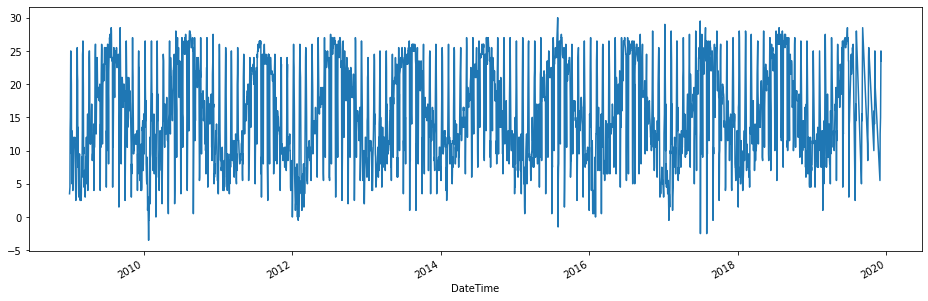

In [5]:
df['AvgTemp'].plot(figsize=(16,5))

In [7]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AvgTemp'])

1. ADF :  -3.497830396594713
2. P-Value :  0.008042989214366261
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 3570
5. Critical Values :
	 1% :  -3.432183055516335
	 5% :  -2.862349940934467
	 10% :  -2.567201144771634


In [12]:

# p değerimiz 0.05'in üzerinde olsaydı 
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13857.997, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24286.762, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14148.081, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20295.601, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30715.234, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13988.426, Time=1.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14096.036, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13855.223, Time=2.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13854.361, Time=2.59 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=14012.847, Time=0.91 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=13855.439, Time=2.86 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14136.745, Time=0.61 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=13967.806, Time=1.01 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=13853.274, Time=3.59 sec
 ARIMA(5,0,2)(0,0,0

In [10]:
print(df.shape)
train=df.iloc[:-60]
test=df.iloc[-60:]
print(train.shape,test.shape)

(3594, 12)
(3534, 12) (60, 12)


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(5,0,3))
model=model.fit()
model.summary()

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 3534
Model:                     ARMA(5, 3)   Log Likelihood               -6780.287
Method:                       css-mle   S.D. of innovations              1.647
Date:                Wed, 20 Jul 2022   AIC                          13580.575
Time:                        11:16:12   BIC                          13642.277
Sample:                             0   HQIC                         13602.584
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.0779      2.027      7.933      0.000      12.105      20.050
ar.L1.AvgTemp     0.0007      0.074      0.009      0.993      -0.144       0.145
ar.L2.AvgTemp     1.2613      0.074     16.946      0.000       1.115       1.407
ar.L3.AvgTemp     0.0531      0.051      1.041      0.298      -0.047       0.153
ar.L4.AvgTemp    -0.5195      0.049    -10.523      0.000      -0.616      -0.423
ar.L5.AvgTemp     0.1951      0.022      8.703      0.000       0.151       0.239
ma.L1.AvgTemp     0.9804      0.072     13.547      0.000       0.839       1.122
ma.L2.AvgTemp    -0.5350      0.042    -12.773      0.000      -0.617      -0.453
ma.L3.AvgTemp    -0.7300      0.052    -13.911      0.000      -0.833      -0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9821           -0.3742j            1.0510           -0.4421
AR.2           -0.9821           +0.3742j            1.0510            0.4421
AR.3            1.0059           -0.0000j            1.0059           -0.0000
AR.4            1.8109           -1.1554j            2.1481           -0.0904
AR.5            1.8109           +1.1554j            2.1481            0.0904
MA.1            1.2403           -0.0000j            1.2403           -0.0000
MA.2           -0.9866           -0.3620j            1.0509           -0.4440
MA.3           -0.9866           +0.3620j            1.0509            0.4440
-----------------------------------------------------------------------------
"""

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


DateTime
2009-06-03    14.0
2009-05-03    10.5
2009-04-03     7.5
2009-03-03     6.0
2009-01-03     4.5
2009-02-28     3.5
2009-02-27     2.5
2009-02-26     3.0
2009-02-25     4.0
2009-02-24     3.5
2009-02-23     2.5
2009-02-22     2.5
2009-02-21     3.5
2009-02-20     6.5
2009-02-19     9.5
2009-02-18     7.5
2009-02-17     3.5
2009-02-16     3.0
2009-02-15     3.5
2009-02-13     7.0
2009-12-02     9.5
2009-11-02     8.0
2009-10-02     5.5
2009-09-02    10.5
2009-08-02    13.0
2009-07-02    13.0
2009-06-02    12.5
2009-05-02    13.5
2009-04-02    11.5
2009-03-02     9.0
2009-02-02     7.0
2009-01-31     4.5
2009-01-30     5.5
2009-01-29     8.0
2009-01-28    10.0
2009-01-27    12.0
2009-01-26    11.5
2009-01-25    11.5
2009-01-24    11.5
2009-01-23    10.5
2009-01-22    12.0
2009-01-21    11.0
2009-01-20    10.0
2009-01-19     6.0
2009-01-18     4.0
2009-01-17     4.0
2009-01-15    11.0
2009-01-14     5.5
2009-01-13     5.0
2009-12-01     4.0
2009-11-01     3.0
2009-10-01     2.5
200

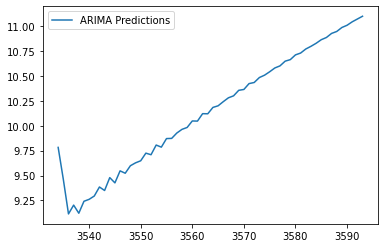

In [50]:

start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)
print(test["AvgTemp"])

In [28]:
df.index = pd.to_datetime(df.index)

In [32]:
df.index.dtype

dtype('<M8[ns]')

In [33]:
for col in df.columns:
    if df[col].dtype == '<M8[ns]':
        df[col].dtype = 'datetime64[ns]'

In [34]:
df.index.dtype

dtype('<M8[ns]')

In [35]:
df.index

DatetimeIndex(['2019-07-22', '2019-07-21', '2019-07-20', '2019-07-19',
               '2019-07-18', '2019-07-17', '2019-07-16', '2019-07-15',
               '2019-07-14', '2019-07-13',
               ...
               '2009-11-01', '2009-10-01', '2009-09-01', '2009-08-01',
               '2009-07-01', '2009-06-01', '2009-05-01', '2009-04-01',
               '2009-02-01', '2009-01-01'],
              dtype='datetime64[ns]', name='DateTime', length=3594, freq=None)

In [36]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: view limit minimum -32976.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -32976.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

4.916762461149153


In [38]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)

3534     9.782704
3535     9.461833
3536     9.115287
3537     9.203676
3538     9.122239
3539     9.242051
3540     9.261557
3541     9.294848
3542     9.385388
3543     9.350346
3544     9.479527
3545     9.426732
3546     9.547231
3547     9.523448
3548     9.598669
3549     9.627748
3550     9.648481
3551     9.725028
3552     9.709057
3553     9.806265
3554     9.785152
3555     9.871175
3556     9.872995
3557     9.926761
3558     9.963591
3559     9.982720
3560    10.047878
3561    10.046428
3562    10.120981
3563    10.119909
3564    10.183748
3565    10.199861
3566    10.241321
3567    10.280163
3568    10.299965
3569    10.355254
3570    10.363934
3571    10.422637
3572    10.433851
3573    10.483501
3574    10.507072
3575    10.541504
3576    10.579519
3577    10.600620
3578    10.647852
3579    10.663226
3580    10.710899
3581    10.729285
3582    10.769822
3583    10.796798
3584    10.827155
3585    10.863101
3586    10.885374
3587    10.926234
3588    10.945755
3589    10

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [39]:
df.tail()

,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
DateTime,,,,,,,,,,,,
2009-06-01,Overcast,2.71,5,3,08:29:00,17:51:00,13:13:00,3:9:00,22,96,1014,4.0
2009-05-01,Overcast,4.32,5,3,08:29:00,17:50:00,0:41:00,1:57:00,15,97,1015,4.0
2009-04-01,Mist,2.91,5,3,08:29:00,17:49:00,0:15:00,12:48:00,9,94,1014,4.0
2009-02-01,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021,2.5
2009-01-01,Partly cloudy,0.23,5,2,08:29:00,17:47:00,11:9:00,22:39:00,10,90,1027,3.5


In [41]:
y = df.index.astype("datetime64[ns]")
y

DatetimeIndex(['2019-07-22', '2019-07-21', '2019-07-20', '2019-07-19',
               '2019-07-18', '2019-07-17', '2019-07-16', '2019-07-15',
               '2019-07-14', '2019-07-13',
               ...
               '2009-11-01', '2009-10-01', '2009-09-01', '2009-08-01',
               '2009-07-01', '2009-06-01', '2009-05-01', '2009-04-01',
               '2009-02-01', '2009-01-01'],
              dtype='datetime64[ns]', name='DateTime', length=3594, freq=None)

In [42]:
df.index = y

In [43]:
df.index.dtype

dtype('<M8[ns]')

In [44]:
import numpy as np
dizi0 = np.array(10)
print(dizi0.ndim)

0


In [47]:
dizi=numpy.array(['A','B','C','D'])
print(dizi)
['A','B','C','D'] 
print(dizi)

NameError: name 'numpy' is not defined

In [49]:
dizi = [1,2,3,4,5,6]
dizi[0:5]

[1, 2, 3, 4, 5]

In [52]:
df.corr()

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,AvgTemp
Rain,1.000000,-0.144986,-0.122515,0.159764,0.282582,-0.157927,-0.136219
MaxTemp,-0.144986,1.000000,0.945040,-0.146448,-0.468263,-0.435061,0.987587
MinTemp,-0.122515,0.945040,1.000000,-0.051512,-0.368509,-0.394109,0.984665
AvgWind,0.159764,-0.146448,-0.051512,1.000000,0.203239,0.086660,-0.102889
AvgHumidity,0.282582,-0.468263,-0.368509,0.203239,1.000000,-0.012243,-0.426891
AvgPressure,-0.157927,-0.435061,-0.394109,0.086660,-0.012243,1.000000,-0.421474
AvgTemp,-0.136219,0.987587,0.984665,-0.102889,-0.426891,-0.421474,1.000000


In [54]:
import pandas as pd
df=pd.read_csv("weatherHistory.csv",index_col='Formatted Date', parse_dates=True)
df.index = pd.to_datetime(df.index,utc=True)


In [56]:
df.index.dtype


datetime64[ns, UTC]

In [57]:
df.index

DatetimeIndex(['2006-03-31 22:00:00+00:00', '2006-03-31 23:00:00+00:00',
               '2006-04-01 00:00:00+00:00', '2006-04-01 01:00:00+00:00',
               '2006-04-01 02:00:00+00:00', '2006-04-01 03:00:00+00:00',
               '2006-04-01 04:00:00+00:00', '2006-04-01 05:00:00+00:00',
               '2006-04-01 06:00:00+00:00', '2006-04-01 07:00:00+00:00',
               ...
               '2016-09-09 12:00:00+00:00', '2016-09-09 13:00:00+00:00',
               '2016-09-09 14:00:00+00:00', '2016-09-09 15:00:00+00:00',
               '2016-09-09 16:00:00+00:00', '2016-09-09 17:00:00+00:00',
               '2016-09-09 18:00:00+00:00', '2016-09-09 19:00:00+00:00',
               '2016-09-09 20:00:00+00:00', '2016-09-09 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [66]:
df.resample(rule='24H', closed='left', label='left', base=13)

In [67]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [71]:
seriess = df.index
type(seriess)

pandas.core.indexes.datetimes.DatetimeIndex

In [69]:
seriess.resample("1D").mean()
seriess

AttributeError: 'DatetimeIndex' object has no attribute 'resample'

In [72]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [73]:
dataFrame = pd.read_csv("testset.csv",index_col = "datetime_utc", parse_dates=True)
dataFrame.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [74]:
dataFrame.corr()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
_dewptm,1.000000,-0.217862,0.003518,0.447637,0.314661,NaN,-0.003905,0.144202,0.004140,0.527915,0.067826,-0.000153,0.010339,-0.159256,-0.088603,0.346463,-0.006930
_fog,-0.217862,1.000000,-0.003106,-0.003694,0.378691,NaN,-0.000875,-0.044947,-0.000861,-0.450534,-0.026700,-0.001218,-0.023019,-0.095019,NaN,-0.015488,-0.100472
_hail,0.003518,-0.003106,1.000000,NaN,0.007513,NaN,-0.000033,-0.001863,-0.000036,-0.002877,0.107280,-0.000050,-0.000475,0.005228,-0.002996,NaN,0.003026
_heatindexm,0.447637,-0.003694,NaN,1.000000,-0.044930,NaN,-0.003068,-0.075930,NaN,0.726131,-0.048912,0.002158,-0.002240,0.103451,-0.125972,NaN,0.069788
_hum,0.314661,0.378691,0.007513,-0.044930,1.000000,NaN,-0.005725,0.172021,0.004390,-0.589912,0.073436,-0.000921,-0.025159,-0.336648,0.056811,-0.039568,-0.230726
_precipm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_pressurem,-0.003905,-0.000875,-0.000033,-0.003068,-0.005725,NaN,1.000000,-0.000532,-0.000009,0.004684,-0.000330,-0.000013,0.000170,0.004538,-0.006100,-0.014467,-0.000150
_rain,0.144202,-0.044947,-0.001863,-0.075930,0.172021,NaN,-0.000532,1.000000,-0.000517,-0.007418,0.422295,-0.000731,-0.004115,-0.022441,0.136379,NaN,0.034911
_snow,0.004140,-0.000861,-0.000036,NaN,0.004390,NaN,-0.000009,-0.000517,1.000000,0.000204,-0.000307,-0.000014,-0.000062,0.002453,NaN,NaN,0.000433
_tempm,0.527915,-0.450534,-0.002877,0.726131,-0.589912,NaN,0.004684,-0.007418,0.000204,1.000000,0.000298,0.001342,0.033270,0.156525,-0.136216,0.880264,0.224876


In [75]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0    _conds       100918 non-null  object 
 1    _dewptm      100369 non-null  float64
 2    _fog         100990 non-null  int64  
 3    _hail        100990 non-null  int64  
 4    _heatindexm  29155 non-null   float64
 5    _hum         100233 non-null  float64
 6    _precipm     0 non-null       float64
 7    _pressurem   100758 non-null  float64
 8    _rain        100990 non-null  int64  
 9    _snow        100990 non-null  int64  
 10   _tempm       100317 non-null  float64
 11   _thunder     100990 non-null  int64  
 12   _tornado     100990 non-null  int64  
 13   _vism        96562 non-null   float64
 14   _wdird       86235 non-null   float64
 15   _wdire       86235 non-null   object 
 16   _wgustm      1072 non-null    float64
 17   _windchillm  

In [79]:
dataFrame.drop("_precipm",axis=0)

KeyError: "['_precipm'] not found in axis"

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
weather_df = pd.read_csv('testset.csv', parse_dates=['datetime_utc'], index_col='datetime_utc')
weather_df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [84]:
weather_df = weather_df.loc[:,[' _conds', ' _hum', ' _tempm']]
weather_df = weather_df.rename(index=str, columns={' _conds': 'condition', ' _hum': 'humidity', ' _pressurem': 'pressure', ' _tempm': 'temprature'})
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.head()

dataset shape (rows, columns) - (100990, 3)


,condition,humidity,temprature
datetime_utc,,,
1996-11-01 11:00:00,Smoke,27.0,30.0
1996-11-01 12:00:00,Smoke,32.0,28.0
1996-11-01 13:00:00,Smoke,44.0,24.0
1996-11-01 14:00:00,Smoke,41.0,24.0
1996-11-01 16:00:00,Smoke,47.0,23.0


In [85]:
weather_df.index = pd.to_datetime(weather_df.index)

In [86]:
weather_df.ffill(inplace=True)
weather_df[weather_df.isnull()].count()

condition     0
humidity      0
temprature    0
dtype: int64

In [87]:
weather_df.describe()

,humidity,temprature
count,100990.000000,100990.000000
mean,57.957422,25.438222
std,23.821218,8.487994
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,243.000000,90.000000


In [88]:
weather_df = weather_df[weather_df.temprature < 50]
weather_df = weather_df[weather_df.humidity <= 100]

Text(0, 0.5, 'Percent')

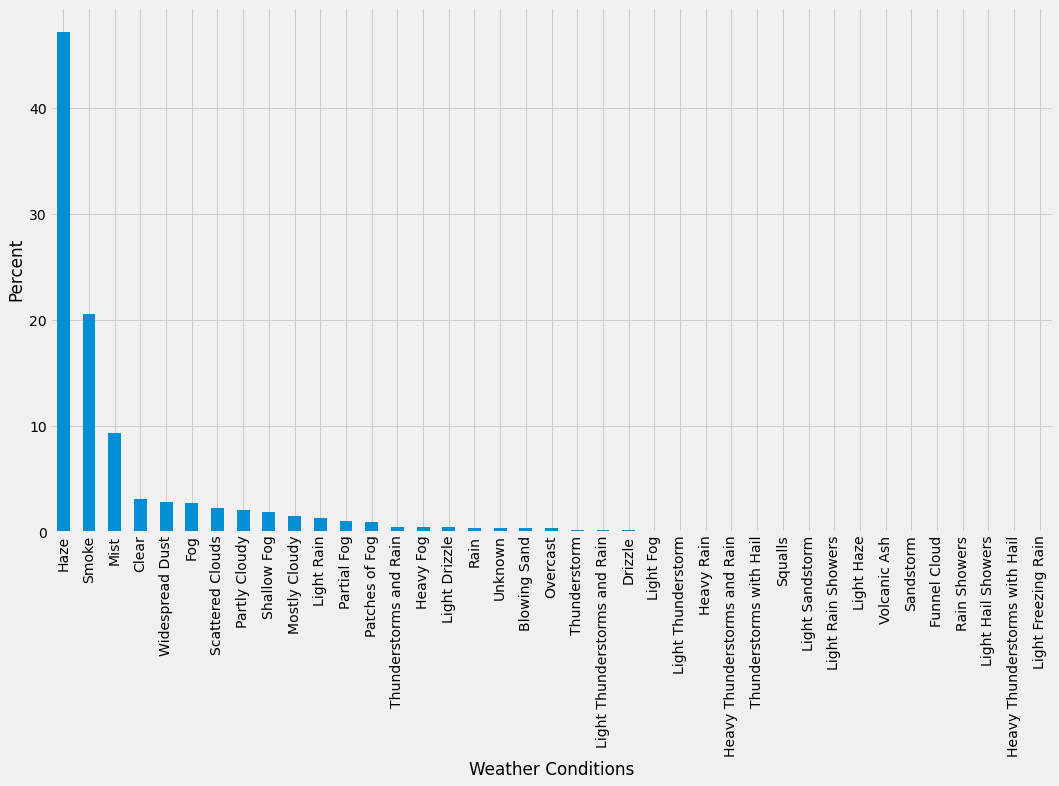

In [89]:
weather_condition = (weather_df.condition.value_counts()/(weather_df.condition.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCF042F1F0>,
      dtype=object)

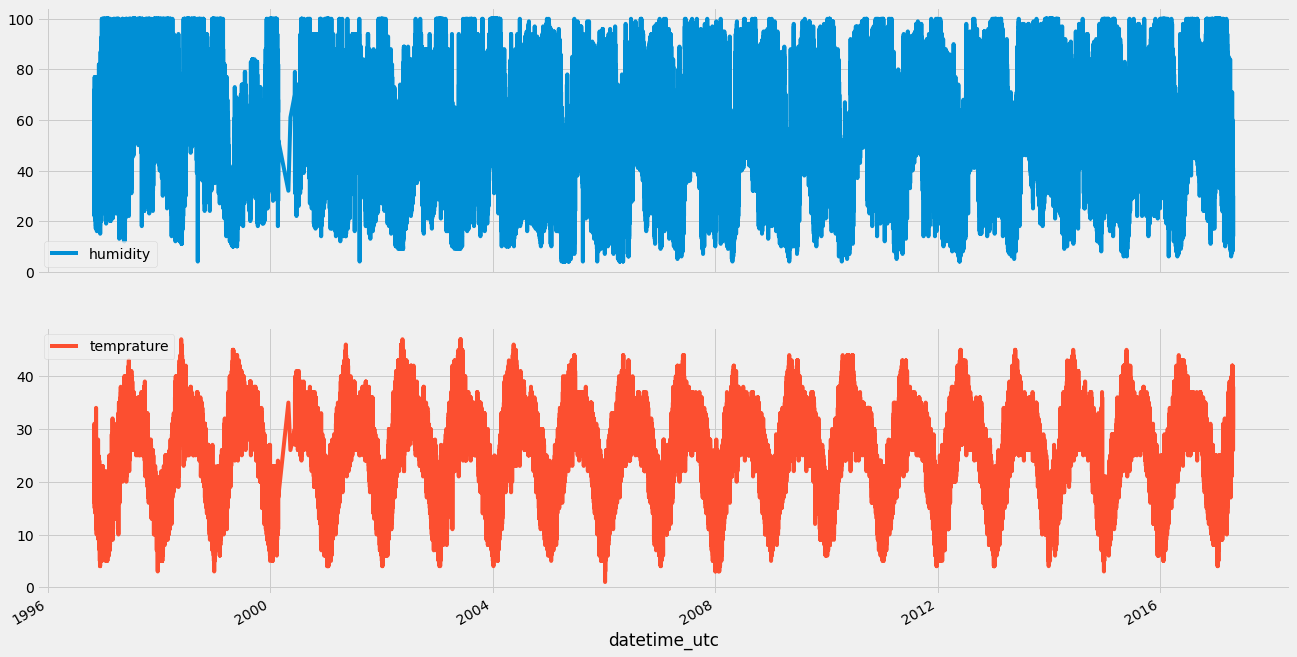

In [90]:
weather_df.plot(subplots=True, figsize=(20,12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCFEC53670>,
      dtype=object)

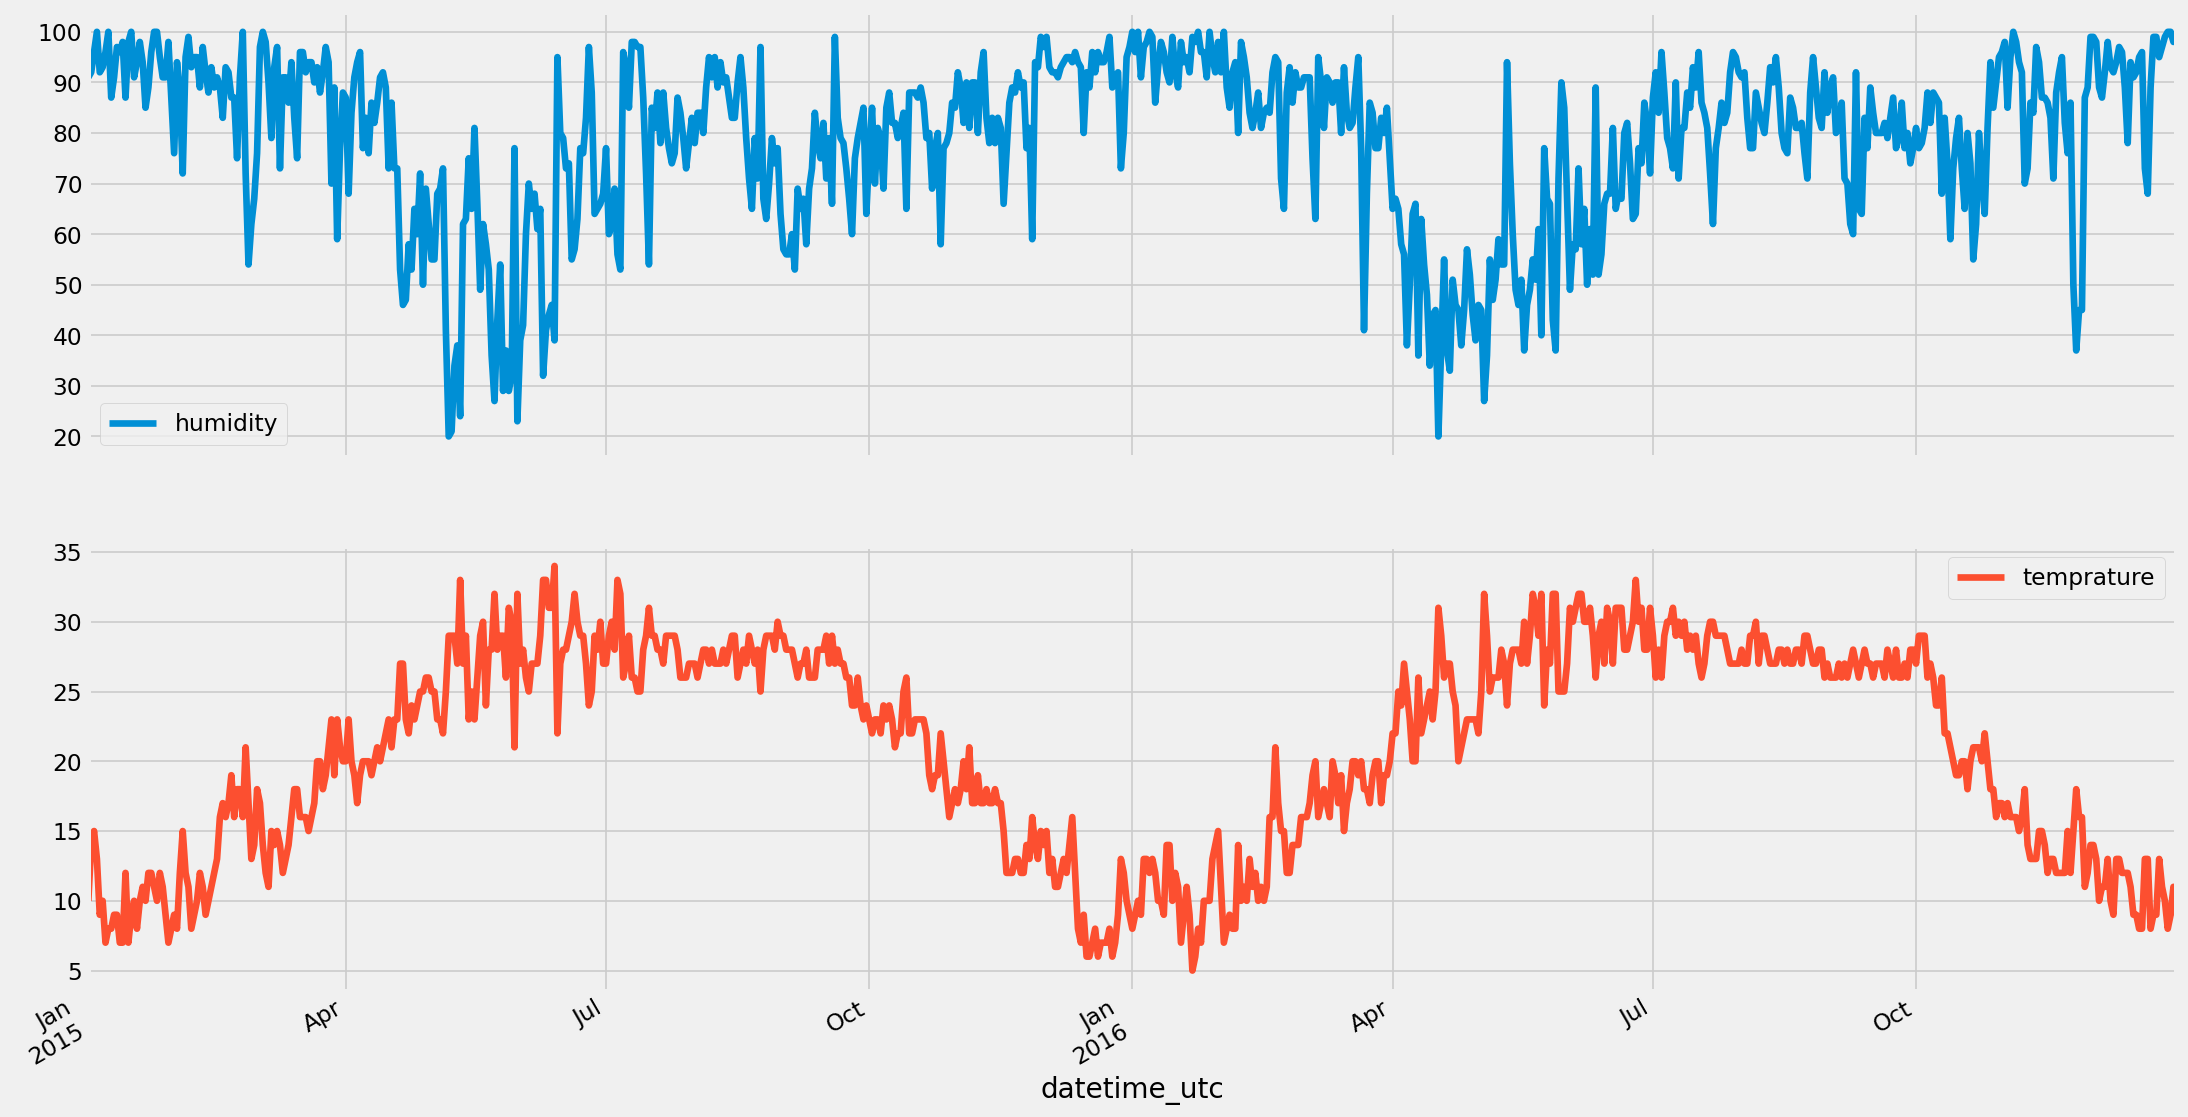

In [113]:
weather_df['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [114]:
train_df = weather_df['2000':'2015'].resample('D').mean().fillna(method='pad')
train_df.drop(columns='humidity', axis=1, inplace=True)
test_df = weather_df['2016':'2017'].resample('D').mean().fillna(method='pad')
test_df.drop(columns='humidity', axis=1, inplace=True)

In [115]:
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [116]:
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

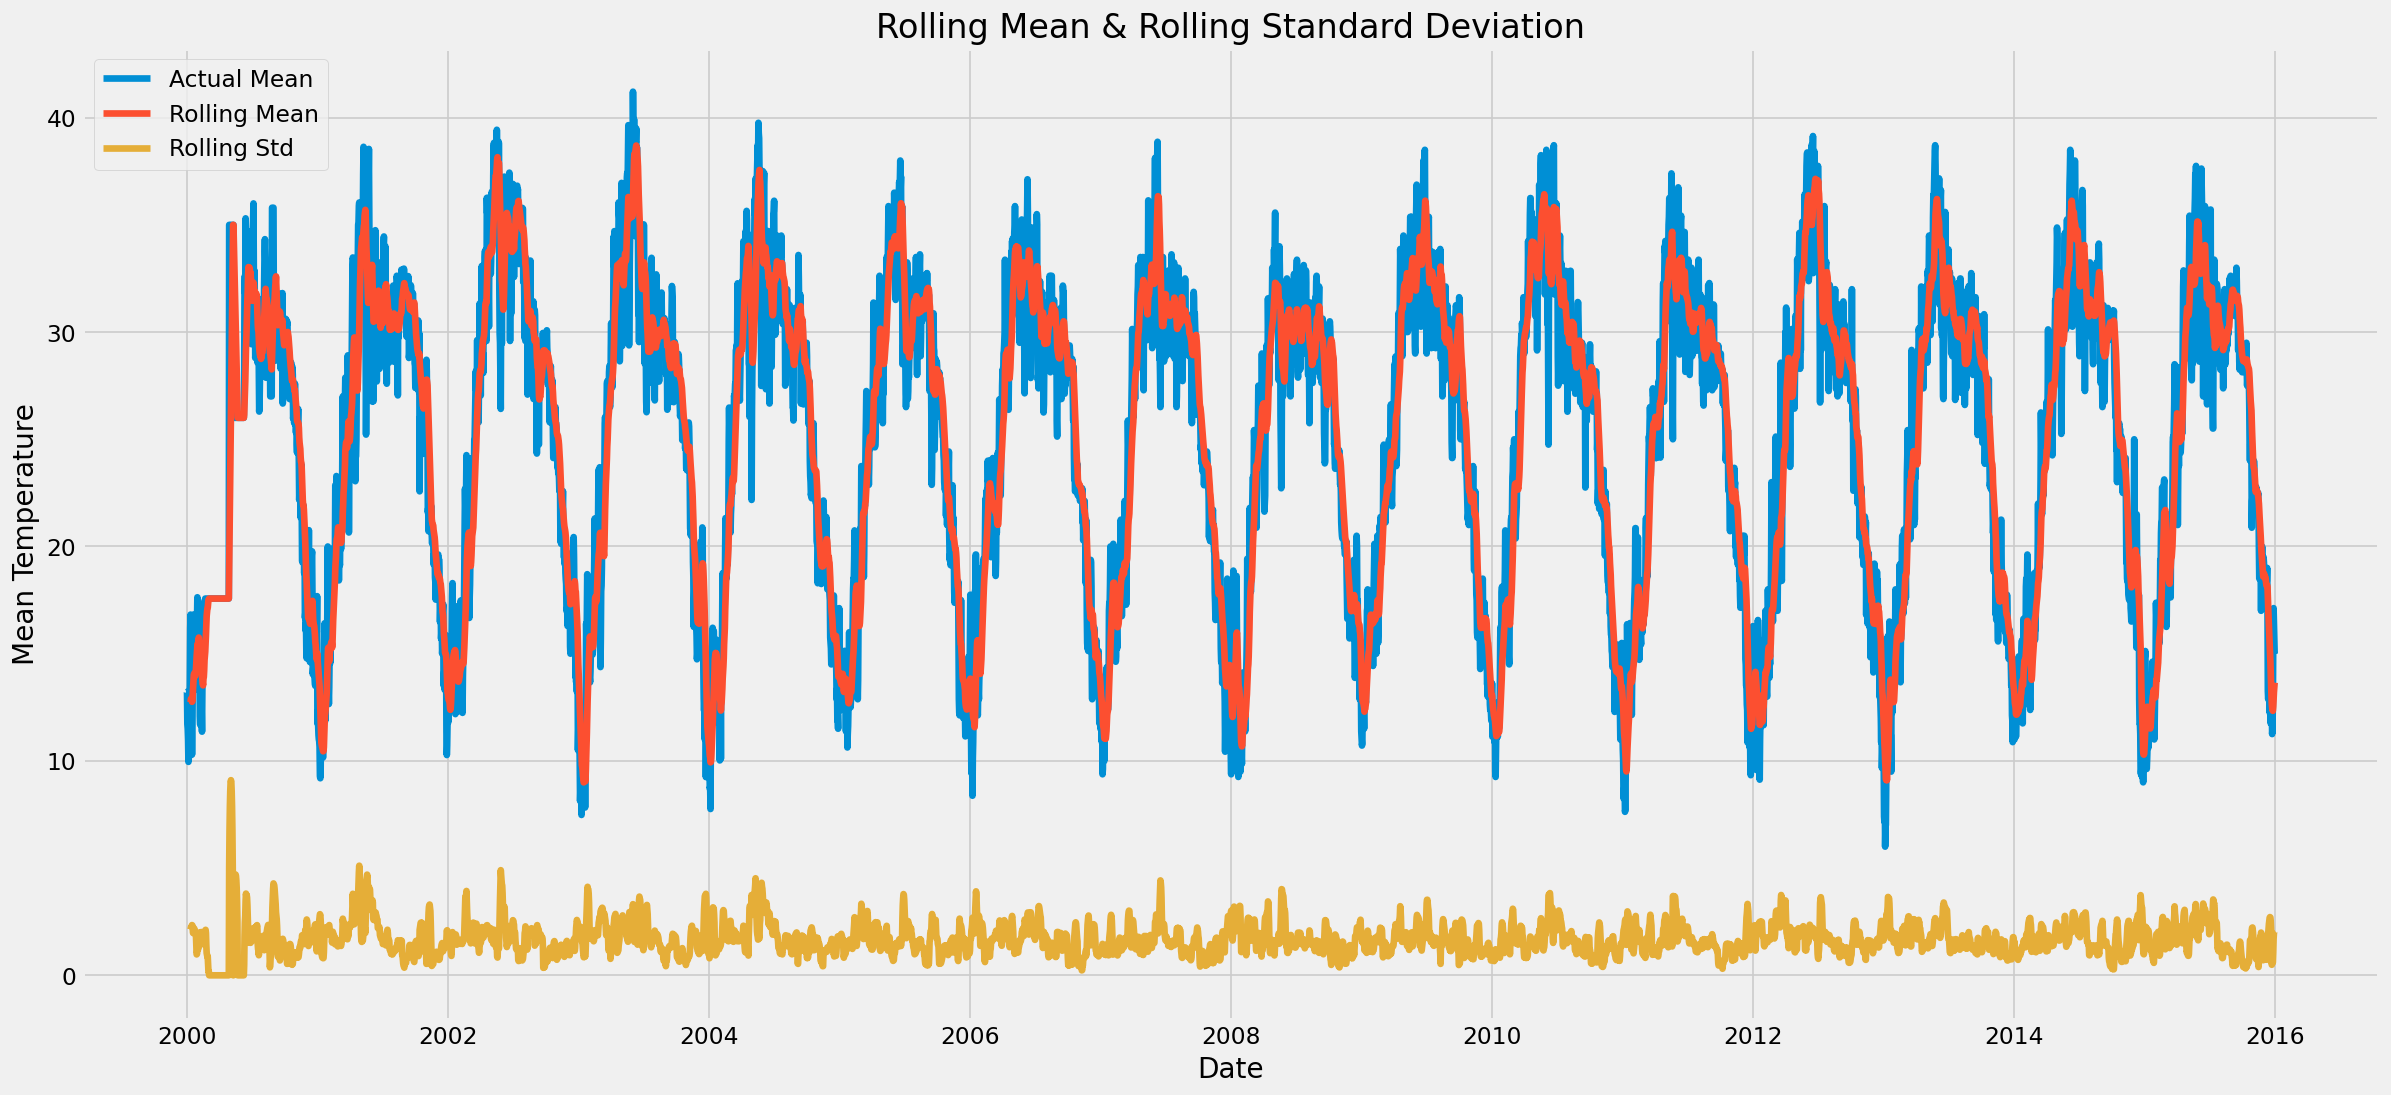

Test statistic:  -5.784983366788543
Critical Values: {'1%': -3.4314762165618764, '5%': -2.862037681193934, '10%': -2.567034913678773}


In [117]:
plot_rolling_mean_std(train_df.temprature)
perform_dickey_fuller_test(train_df.temprature)

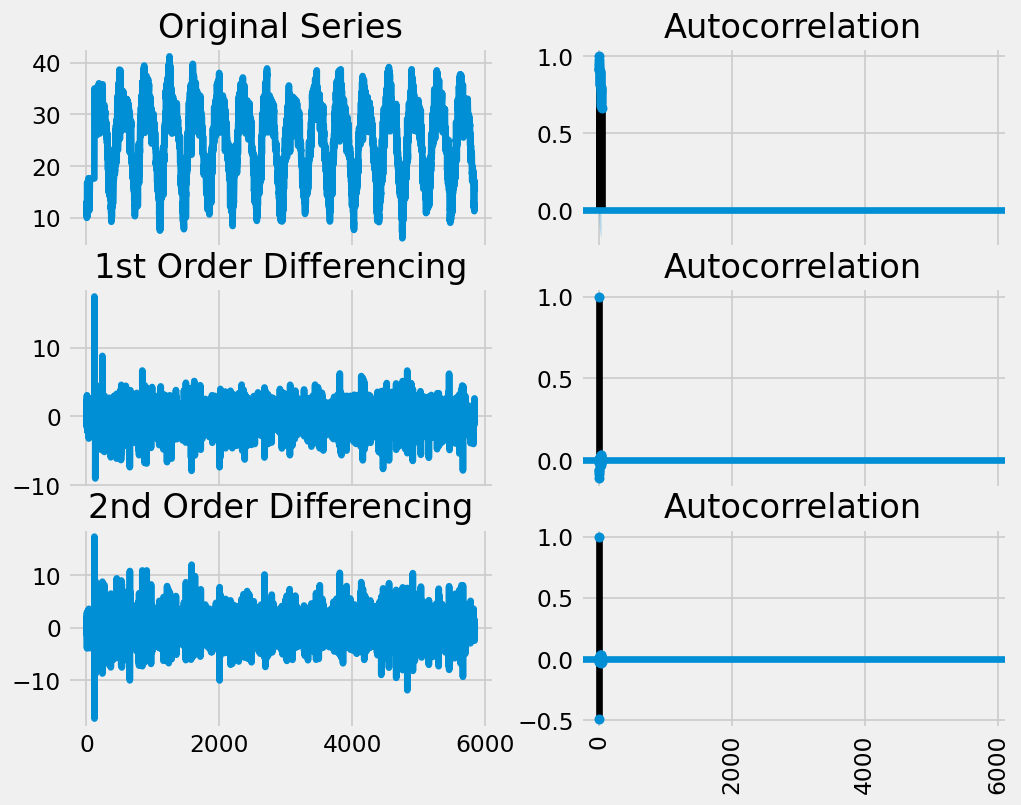

In [118]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train_df.temprature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_df.diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train_df.temprature.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_df.diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


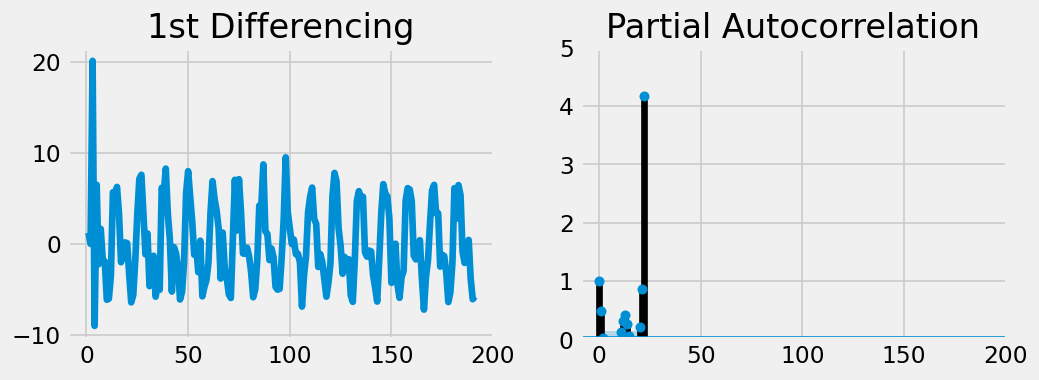

In [103]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

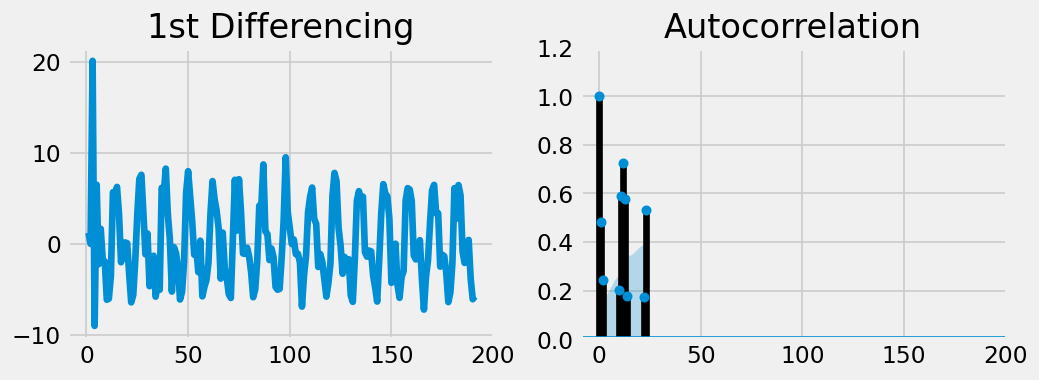

In [104]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

In [120]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train_df['temprature'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21819.595, Time=4.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39938.211, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22071.496, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33590.383, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54742.821, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21926.002, Time=1.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21846.365, Time=5.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=21840.688, Time=3.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=21819.077, Time=4.59 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=21856.554, Time=2.35 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=21822.673, Time=4.99 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=21817.695, Time=5.86 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=21826.991, Time=2.82 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=21812.358, Time=9.01 sec
 ARIMA(4,0,4)(0,0,0

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


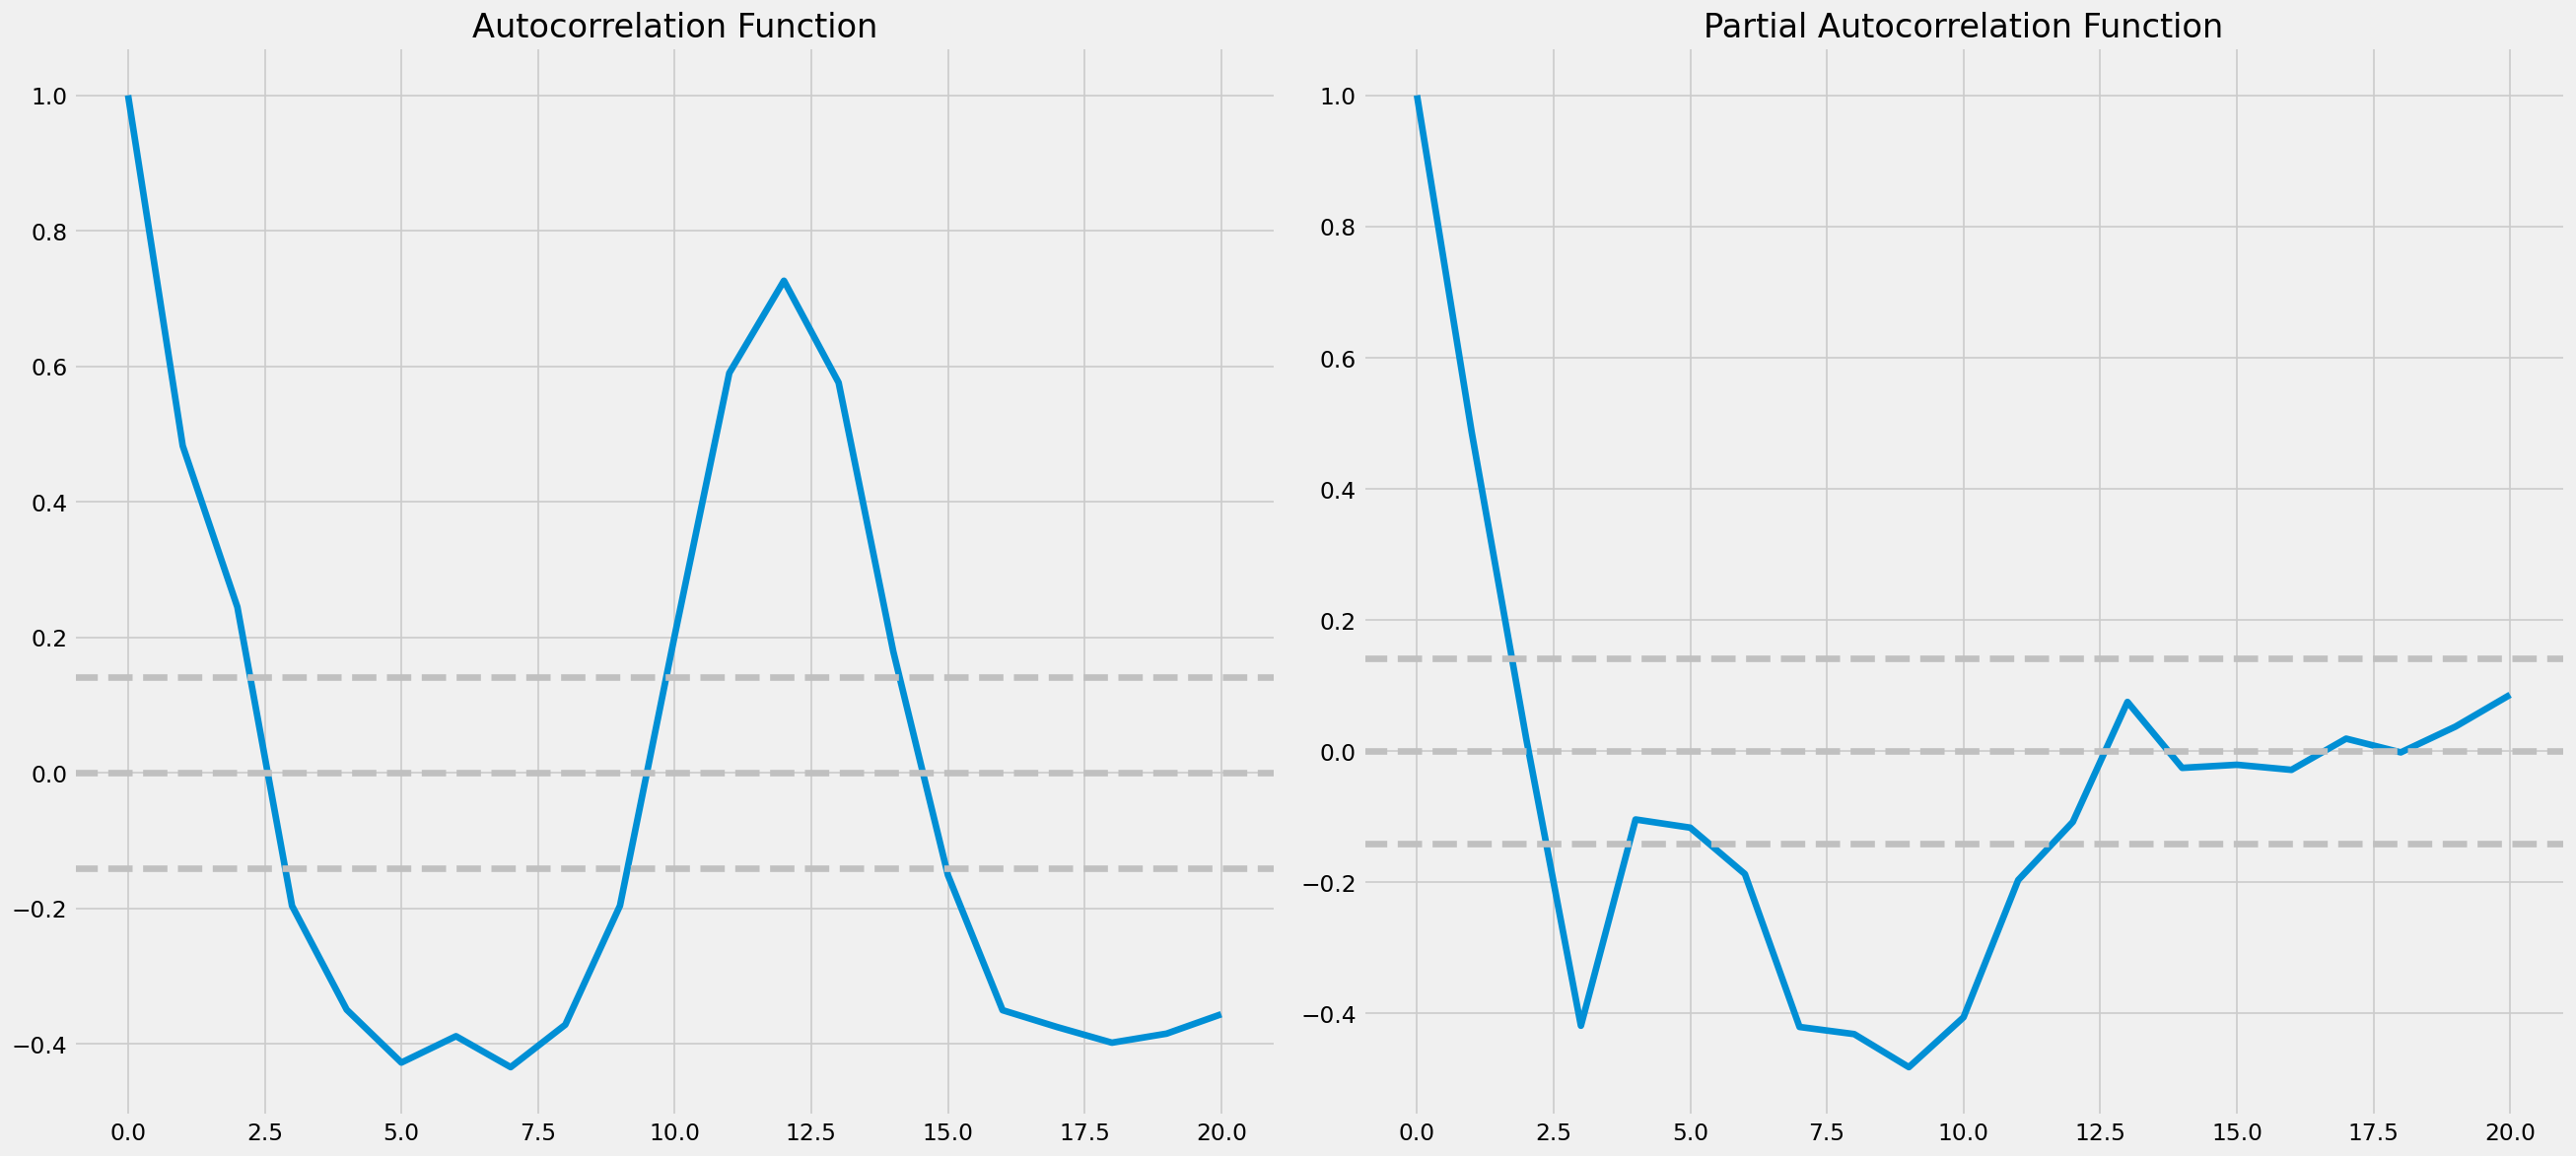

In [105]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [121]:
model = ARIMA(train_df.values, order=(3,0,4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5844
Model:                     ARMA(3, 4)   Log Likelihood              -10843.804
Method:                       css-mle   S.D. of innovations              1.547
Date:                Thu, 21 Jul 2022   AIC                          21705.608
Time:                        16:24:44   BIC                          21765.667
Sample:                             0   HQIC                         21726.493
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0553      0.702     34.248      0.000      22.679      25.432
ar.L1.y        2.6320        nan        nan        nan         nan         nan
ar.L2.y       -2.2713        nan        nan        n

C:\Users\fatih\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


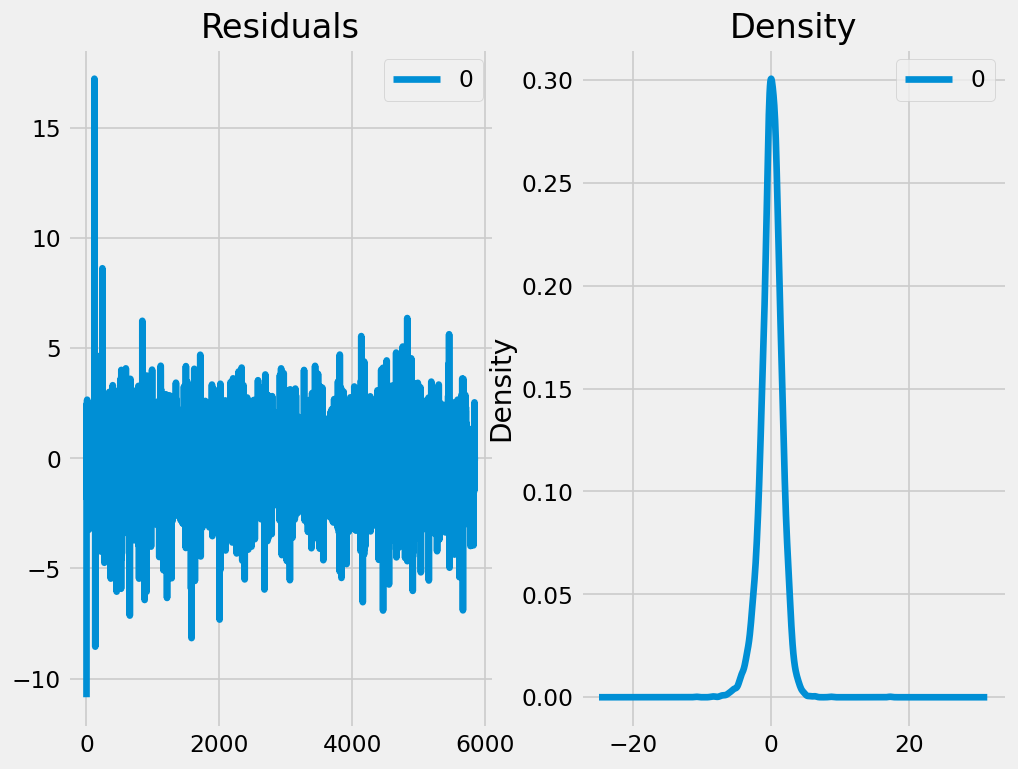

In [123]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

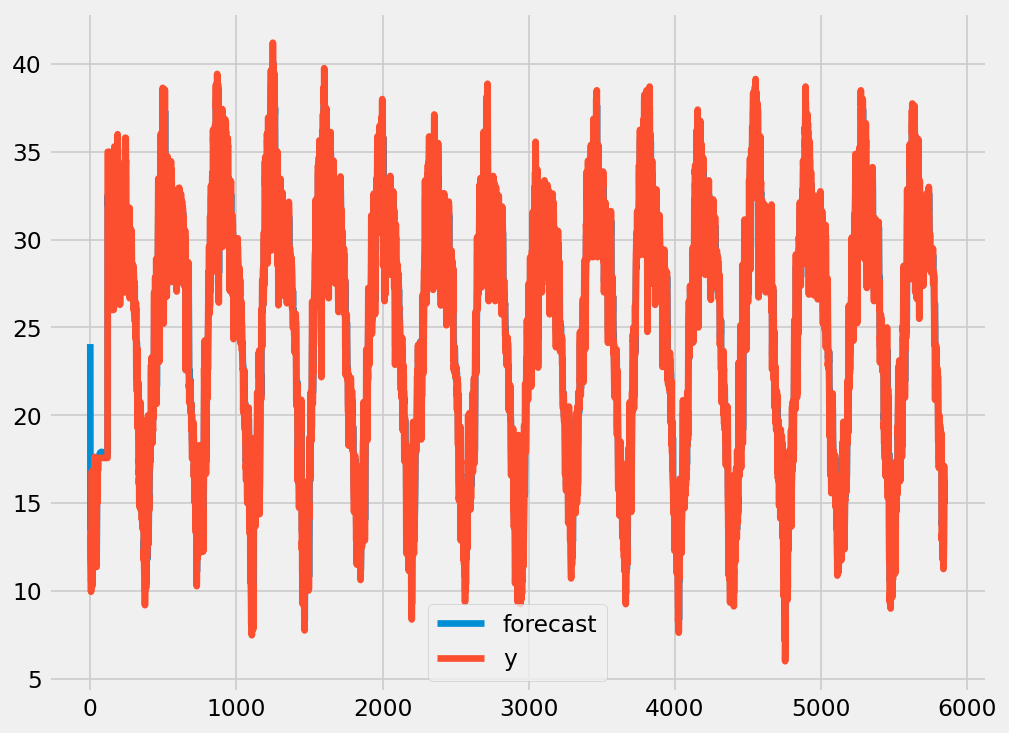

In [124]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [125]:
# # Forecast
fc, se, conf = model_fit.forecast(16, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# test_df.index

ValueError: Length of passed values is 16, index implies 480.

In [111]:
print(fc)
test_df.index

[15.02194795 17.39525529 21.78615071 26.89702444 31.29581288 33.81402604
 33.85356526 31.5228262  27.57308345 23.16215577 19.51827829 17.60088647
 17.85121036 20.09655352 23.627038   27.41553689]


DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', name='datetime_utc', freq='M')